In [1]:
import pandas as pd
from naive_bayes import GaussianNaiveBayesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from testing import k_fold_cross_validation

In [2]:
df = pd.read_csv('datasets/seattle-weather.csv', delimiter=',')
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [3]:
print(min(df['precipitation'].value_counts()))
print(max(df['precipitation'].value_counts()))
print(df['precipitation'].value_counts())

1
838
0.0     838
0.3      54
0.5      40
1.0      26
1.5      25
       ... 
30.0      1
26.4      1
19.1      1
46.7      1
21.8      1
Name: precipitation, Length: 111, dtype: int64


In [4]:
print(min(df['temp_max'].value_counts()))
print(max(df['temp_max'].value_counts()))
print(df['temp_max'].value_counts())

1
58
 11.1    58
 14.4    49
 10.0    47
 12.8    46
 12.2    44
         ..
-0.5      1
-1.6      1
 35.6     1
-1.1      1
 35.0     1
Name: temp_max, Length: 67, dtype: int64


In [5]:
print(min(df['temp_min'].value_counts()))
print(max(df['temp_min'].value_counts()))
print(df['temp_min'].value_counts())

1
66
 6.1     66
 10.0    64
 11.7    60
 7.2     60
 13.3    58
 11.1    56
 4.4     55
 13.9    54
 9.4     53
 8.3     52
 15.0    51
 8.9     51
 5.6     50
 6.7     47
 14.4    46
 7.8     46
 12.2    45
 2.8     45
 12.8    45
 3.3     44
 3.9     44
 5.0     41
 10.6    37
 1.7     30
 0.6     28
 1.1     27
 15.6    27
 2.2     24
 16.1    23
 0.0     16
 16.7    15
 17.2    14
 17.8     9
-0.5      9
-2.1      8
-0.6      7
-1.1      7
-2.8      7
-1.7      6
 18.3     6
-4.9      4
-1.6      3
-3.2      3
-2.2      3
-1.0      2
-2.7      2
-4.3      2
-3.9      2
-6.6      1
-7.1      1
-5.5      1
-6.0      1
-3.3      1
-4.4      1
-3.8      1
Name: temp_min, dtype: int64


In [6]:
print(min(df['wind'].value_counts()))
print(max(df['wind'].value_counts()))
print(df['wind'].value_counts())

1
76
2.6    76
3.0    65
2.2    55
2.5    51
2.8    47
       ..
8.2     1
0.4     1
0.7     1
6.9     1
7.7     1
Name: wind, Length: 79, dtype: int64


In [7]:
print(df['weather'].value_counts())

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64


In [8]:
X = df.loc[:, ["precipitation", "temp_max", "temp_min", "wind"]]
y = df.loc[:, "weather"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

gnb = GaussianNaiveBayesClassifier()
# gnb = GaussianNB()
gnb.fit(X_train, y_train)

In [10]:
y_pred=gnb.predict(X_test)
print(y_pred)

['sun', 'sun', 'sun', 'sun', 'rain', 'rain', 'sun', 'rain', 'rain', 'rain', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'snow', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain', 'rain', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun', 'rain', 'rain', 'rain', 'rain', 'rain', 'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain', 'rain', 'rain', 'rain', 'sun', 'sun', 'sun', 'rain', 'rain', 'sun', 'rain', 'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain', 'rain', 'sun', 'rain', 'sun', 'rain', 'rain', 'sun', 'rain', 'sun', '

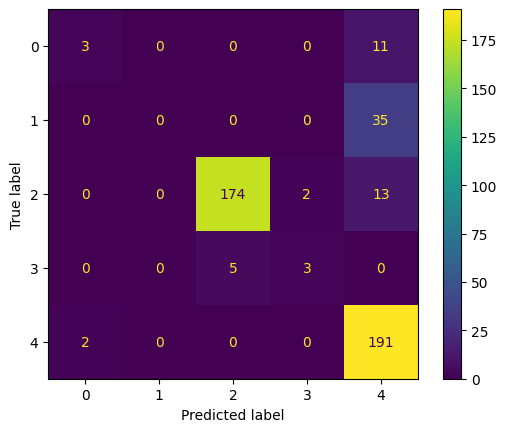

In [11]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

In [12]:
ac = accuracy_score(y_test, y_pred)
print(ac)

0.8451025056947609


In [13]:
# Cross validation

# score = k_fold_cross_validation(mnb.fit, mnb.predict, mnb.reset, X, y, X.shape[0])
# print(score)